In [1]:
import numpy as np
import matplotlib.pyplot as plt

from battle import Battle, BattleResult

from models.V4b import V4b
from models.Randomix import Randomix

from models.Nimber import Nimber

from models.NimberH import NimberH


In [2]:
def calculate_winrate(batch: list[list[BattleResult]]) -> tuple[float, float]:
    total_games = sum(len(results) for results in batch)
    wins_p0 = sum(1 for results in batch for result in results if result.winner == 0)
    wins_p1 = sum(1 for results in batch for result in results if result.winner == 1)
    winrate_p0 = wins_p0 / total_games if total_games > 0 else 0.0
    winrate_p1 = wins_p1 / total_games if total_games > 0 else 0.0
    return winrate_p0, winrate_p1


def calculate_times(
    batch: list[list[BattleResult]],
) -> tuple[list[list[float]], list[list[float]]]:

    times_f0 = [result.time_taken for result in batch[0]]
    times_f1 = [result.time_taken for result in batch[1]]

    times_p0 = [
        list(map(lambda x: x[1], filter(lambda x: x[0] == 0, times)))
        for times in times_f0
    ] + [
        list(map(lambda x: x[1], filter(lambda x: x[0] == 0, times)))
        for times in times_f1
    ]
    times_p1 = [
        list(map(lambda x: x[1], filter(lambda x: x[0] == 1, times)))
        for times in times_f0
    ] + [
        list(map(lambda x: x[1], filter(lambda x: x[0] == 1, times)))
        for times in times_f1
    ]

    return (times_p0, times_p1)

In [3]:
def plot_batch_report(batch: list[list[BattleResult]], labels: tuple[str, str] | None = None, title: str | None = None):
    """
    Plot a concise report for a batch of BattleResult lists.

    - Left: bar chart of winrates for player 0 and player 1
    - Right: boxplot of per-game average move times for each player

    Parameters
    ----------
    batch : list[list[BattleResult]]
        Output from Battle(...).batch(), e.g. [results_when_p0_model0, results_when_p1_model1]
    labels : tuple[str, str] | None
        Labels for the two competitors (left=player0, right=player1). Defaults to ("P0", "P1").
    title : str | None
        Figure title. Defaults to "Report: {labels[0]} vs {labels[1]}".

    Returns
    -------
    fig, ax : matplotlib Figure and AxesArray
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Compute metrics
    winrate_p0, winrate_p1 = calculate_winrate(batch)
    times_p0, times_p1 = calculate_times(batch)

    # Per-game average times for each player
    avg_times_p0 = [np.mean(t) for t in times_p0] if times_p0 else []
    avg_times_p1 = [np.mean(t) for t in times_p1] if times_p1 else []

    # Labels and title
    if labels is None:
        labels = ("P0", "P1")
    if title is None:
        title = f"Report: {labels[0]} vs {labels[1]}"

    # Build figure
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Winrate bar chart
    ax[0].bar([labels[0], labels[1]], [winrate_p0, winrate_p1], color=["royalblue", "darkorange"])
    ax[0].hlines(0.5, xmin=-0.5, xmax=1.5, colors="black", linestyles="dashed")
    ax[0].set_ylim(0, 1)
    ax[0].set_ylabel("Winrate")
    ax[0].set_title("Winrates")

    # Time boxplot (per-game average time)
    try:
        ax[1].boxplot([avg_times_p0, avg_times_p1], tick_labels=[labels[0], labels[1]])
    except TypeError:
        # Fallback for older Matplotlib versions without 'tick_labels'
        bp = ax[1].boxplot([avg_times_p0, avg_times_p1])
        ax[1].set_xticks([1, 2])
        ax[1].set_xticklabels([labels[0], labels[1]])
    ax[1].set_ylabel("Avg move time (s)")
    ax[1].set_title("Avg Times (per game)")

    fig.suptitle(title)
    fig.tight_layout()

    # Console summary
    print(f"{labels[0]} winrate: {winrate_p0:.2%}, {labels[1]} winrate: {winrate_p1:.2%}")

    return fig, ax

V4.2 winrate: 43.75%, V7s winrate: 56.25%


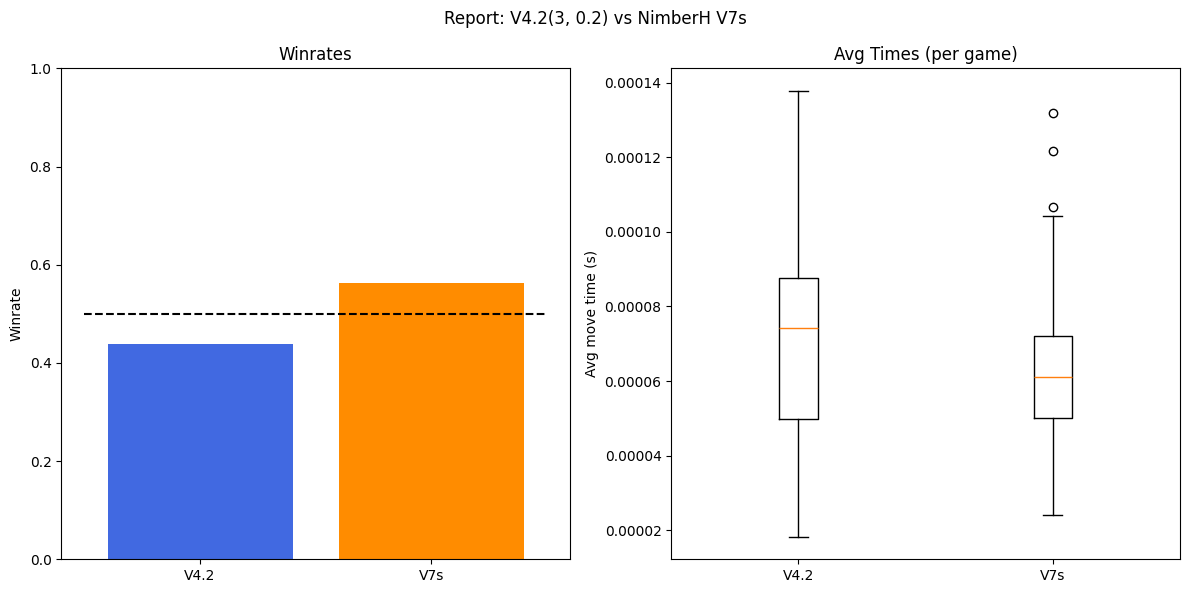

In [4]:
V4b_s = V4b(search_depth=3)
V7s = NimberH()

n = Battle(V4b_s, V7s).batch()

fig, ax = plot_batch_report(n, labels=("V4.2", "V7s"), title="Report: V4.2(3, 0.2) vs NimberH V7s")

plt.show()

V4.2 winrate: 51.88%, V7s winrate: 48.12%


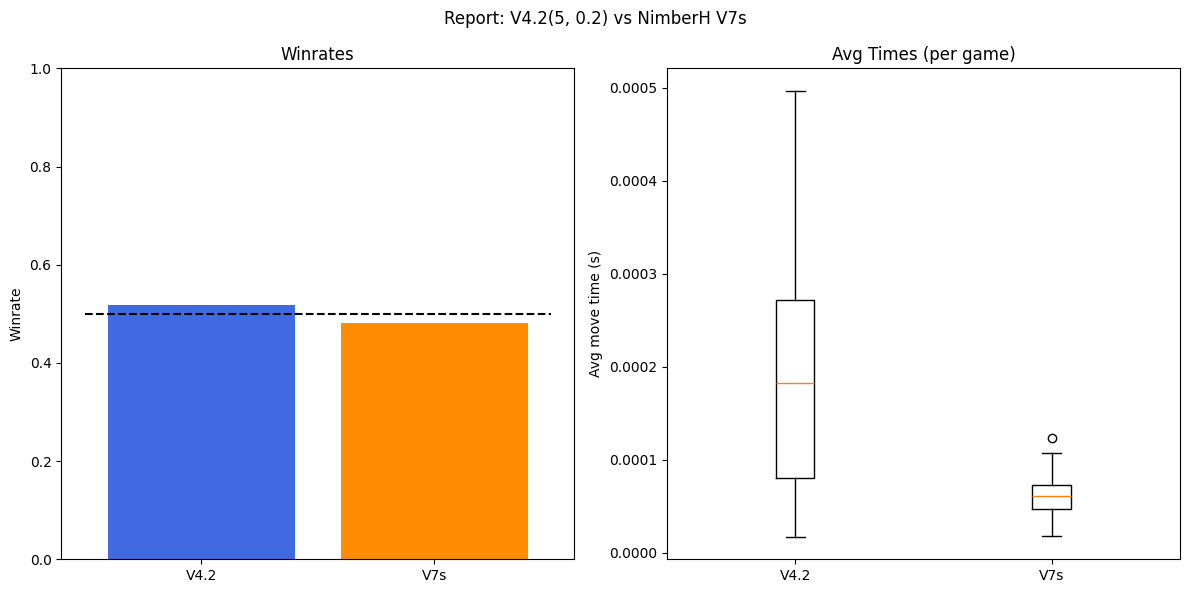

In [8]:
V4b_s = V4b(search_depth=5)
V7s = NimberH()

n = Battle(V4b_s, V7s).batch()

fig, ax = plot_batch_report(n, labels=("V4.2", "V7s"), title="Report: V4.2(5, 0.2) vs NimberH V7s")

plt.show()